## 訓練データの準備

In [1]:
!rm -rf ml
!ls ml
!mkdir ml
# !git init
# !git lfs install
!git clone https://github.com/kokoichi206/ml.git
!cd ml  # cd is not working
!rm -rf lyrics
!mv ml/akimoto-nlp/lyrics .

!cd lyrics && ls | xargs -I@ bash -c 'echo @ && cat @ | wc'

ls: cannot access 'ml': No such file or directory
Cloning into 'ml'...
remote: Enumerating objects: 10355, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 10355 (delta 2), reused 17 (delta 1), pack-reused 10336
Receiving objects: 100% (10355/10355), 565.95 MiB | 28.70 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Checking out files: 100% (10258/10258), done.
乃木坂_lyrics.txt
    232    4209  342207
乃木坂_titles.txt
    232     268    5112
日向坂_lyrics.txt
     73    1874  127763
日向坂_titles.txt
     73      84    1771
櫻坂_lyrics.txt
     53    1525  101273
櫻坂_titles.txt
     53      62    1096


In [2]:
groups = ['乃木坂', '櫻坂', '日向坂']

lyrics_list = []

dir = 'lyrics'
for group in groups:
    with open(f'{dir}/{group}_lyrics.txt', mode='r') as f:
        lyrics_list += f.readlines()

lyrics_str = ''.join(lyrics_list)
print(lyrics_str)

浮かれた気分のステップ鼻歌まじりでご機嫌街は日差しのスクリーン君と久しぶりのランデブーずっと会いたかったけど素直になれなかったんだ先に連絡しちゃったら僕の負けみたいじゃないかI see どうでもいい WOW WOW WOW突然 思ったんだ Yeah Yeah YeahI see そんなこと WOW WOW WOWまるで関係ないね(意地なんか貼ってちゃ)もったいない(自分の気持ちに)素直になろう大事なのは 一つだけ WOW WOW WOW君のことが好きだ水たまりなんかジャンプ何だってできそうな気がする空に愛情の雲行きもう少しで手が届きそう早く気がつけばよかった自分を見失ってたんだ駆け引きなんかいらないカッコつけてどうする？No side 馬鹿馬鹿しい WOW WOW WOWようやく わかったんだ Yeah Yeah YeahNo side 考えすぎ WOW WOW WOW僕は僕じゃないか(我慢なんかしてたって)意味はないよ(心隠せば)苦しくなるさらけ出せばいい WOW WOW WOW君しか見えないよI see どうでもいい WOW WOW WOW突然 思ったんだ Yeah Yeah YeahI see そんなこと WOW WOW WOWまるで関係ないね(意地なんか貼ってちゃ)もったいない(自分の気持ちに)素直になろう大事なのは 一つだけ WOW WOW WOW君のことが好きだやっと素直になれる
会いたかった 会いたかった会いたかった Yes!会いたかった 会いたかった会いたかった Yes!君に…自転車全力でペダル漕ぎながら坂を登る風に膨らんでるシャツも今はもどかしいやっと気づいた 本当の気持ち正直にゆくんだたったひとつこの道を走れ!好きならば 好きだと言おう誤魔化さず 素直になろう好きならば 好きだと言おう胸の内 さらけ出そうよ会いたかった 会いたかった会いたかった Yes!会いたかった 会いたかった会いたかった Yes!君に…どんどん溢れ出す汗も拭わずに素顔のまま木洩れ日のトンネル夏へ続く近道さそんな上手に 話せなくてもストレートでいい自分らしい生き方で走れ!誰よりも 大切だから振られても 後悔しない誰よりも 大切だからこの気持ち 伝えたかった好きならば 好きだと言おう誤魔化さず 素直になろう好きならば 好きだと言おう胸の内 さらけ出そうよラララララ ラララララララ

In [3]:
n_rnn = 10
batch_size = 128
epochs = 20   # 60
n_mid = 128

In [4]:
import numpy as np

chars = sorted(list(set(lyrics_str)))
print('length', len(chars))
char_indices = {}
for i, char in enumerate(chars):
    char_indices[char] = i
indices_char = {}
for i, char in enumerate(chars):
    indices_char[i] = char

time_chars = []
next_chars = []
for i in range(0, len(lyrics_str) - n_rnn):
    time_chars.append(lyrics_str[i: i+n_rnn])
    next_chars.append(lyrics_str[i+n_rnn])

# one-hot 表現
x = np.zeros((len(time_chars), n_rnn, len(chars)), dtype=np.bool) # 入力
t = np.zeros((len(time_chars), len(chars)), dtype=np.bool)         # 正解ラベル
for i, t_cs in enumerate(time_chars):
    t[i, char_indices[next_chars[i]]] = 1
    for j, char in enumerate(t_cs):
        x[i, j, char_indices[char]] = 1

print('shape of x', x.shape)
print('shape of t', t.shape)

length 1831
shape of x (208255, 10, 1831)
shape of t (208255, 1831)


## モデルの準備・訓練

In [5]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU

"""
https://keras.io/ja/layers/recurrent/
"""

# Simple RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(n_mid, input_shape=(n_rnn, len(chars))))
model_rnn.add(Dense(len(chars), activation="softmax"))
model_rnn.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_rnn.summary())

# LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, len(chars))))
model_lstm.add(Dense(len(chars), activation="softmax"))
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_lstm.summary())

# GRU
model_gru = Sequential()
model_gru.add(GRU(n_mid, input_shape=(n_rnn, len(chars))))
model_gru.add(Dense(len(chars), activation="softmax"))
model_gru.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_gru.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               250880    
                                                                 
 dense (Dense)               (None, 1831)              236199    
                                                                 
Total params: 487,079
Trainable params: 487,079
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               1003520   
                                                                 
 dense_1 (Dense)             (None, 1831)              236199    
                                                                 
Total params: 1,239,719

In [6]:
from keras.callbacks import LambdaCallback
 
def on_epoch_end(epoch, logs):
    print("エポック: ", epoch)

    beta = 5  # 確率分布を調整する定数
    prev_text = lyrics_str[0:n_rnn]  # 入力に使う文字
    created_text = prev_text  # 生成されるテキスト
    
    print("シード: ", created_text)

    for i in range(400):
        # 入力をone-hot表現に
        x_pred = np.zeros((1, n_rnn, len(chars)))
        for j, char in enumerate(prev_text):
            x_pred[0, j, char_indices[char]] = 1
        
        # 予測を行い、次の文字を得る
        y = model.predict(x_pred)
        p_power = y[0] ** beta  # 確率分布の調整
        next_index = np.random.choice(len(p_power), p=p_power/np.sum(p_power))        
        next_char = indices_char[next_index]

        created_text += next_char
        prev_text = prev_text[1:] + next_char

    print(created_text)
    print()

# エポック終了後に実行される関数を設定
epock_end_callback= LambdaCallback(on_epoch_end=on_epoch_end)

In [7]:
# Simple RNN
model = model_rnn
history_rnn = model_rnn.fit(x, t,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[epock_end_callback])

Epoch 1/60
1624/1627 [============================>.] - ETA: 0s - loss: 4.8238エポック:  0
シード:  浮かれた気分のステッ
浮かれた気分のステッー …して (oo  Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh Oh

1627/1627 [==============================] - 33s 19ms/step - loss: 4.8225
Epoch 2/60
1627/1627 [==============================] - ETA: 0s - loss: 3.8350エポック:  1
シード:  浮かれた気分のステッ
浮かれた気分のステットにあるよ どこにないか？ものか？ そう 何かないようにもってもいいいからいつからないからなんだろう？(ie dou the go！ Ah Oh！ Oh！Oh！Oh！Oh！Oh！Oh！Oh！Oh！Oh！Oh！Oh！Oh！ Oh！Oh Oh Oh！Oh！Oh！ Oh！Oh！Oh！ Oh Oh Oh Oh！Oh！Oh！Oh！Oh！ Oh Oh！Oh！Oh！Oh！Oh！ Oh Oh！Oh！Oh！Oh！ Oh！ Oh！ Oh！ Oh Oh！Oh！Oh！Oh Oh Oh Oh Oh！ Oh Oh Oh！Oh！Oh！Oh！Oh！ Oh Oh！Oh！Oh！Oh！Oh！ Oh！Oh！Oh！Oh！Oh！

In [11]:
# LSTM
model = model_lstm
history_lstm = model_lstm.fit(x, t,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[epock_end_callback])

Epoch 1/20
1625/1627 [============================>.] - ETA: 0s - loss: 5.0871エポック:  0
シード:  浮かれた気分のステッ
浮かれた気分のステッ    に のにないてるうはってもうにないてるのだけにないたんだのにないていいかっていいるののののののはしてるにないたいのはのはないからないてんだってもうにもうのかっているのにものないているのでのだっているののはににしたいかっているのだっているからないたのだっていいかっていいるのにないたいにないのににしてるのかっていいるにないているかのがないたのかってるってるのにしていいるのかってるのかっていいるのにないているのににしてるいるのにがるにないているのにないたからないるのだっていいるのににないかないたいかっているののにないたいいるのにないてるんだって いのでにしたいからないるの はののがないるのにないているのはがしているのにないないたのにをしてるんだけないにのにないてないたいだっていんだけのののにしてるんだっていいたっていいるってもうのののにないているっていいないかのにないるのかっているのにの

1627/1627 [==============================] - 33s 17ms/step - loss: 5.0869
Epoch 2/20
1626/1627 [============================>.] - ETA: 0s - loss: 4.3010エポック:  1
シード:  浮かれた気分のステッ
浮かれた気分のステッン そうにないたのからないたのから 何をしてるのから そうにないていたっていたのからないたのだろう WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOWOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW 

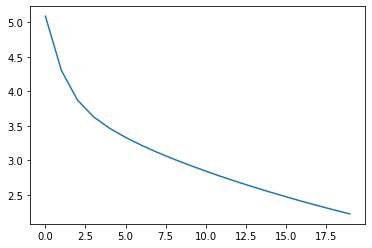

In [12]:
import matplotlib.pyplot as plt

loss = history_lstm.history['loss']

plt.plot(np.arange(len(loss)), loss)
plt.show()

In [7]:
# GRU
model = model_gru
history_gru = model_gru.fit(x, t,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[epock_end_callback])

Epoch 1/20
1626/1627 [============================>.] - ETA: 0s - loss: 4.8192エポック:  0
シード:  浮かれた気分のステッ
浮かれた気分のステッン ドレートに 何をしていたのからないからないからないたのからないて それないからないからないてものからないてものからないとはいつからないからないからないてたんだろう 何かないからないからないことはいつからないたのか？ 人にないたのは そうにないたのからないからないたのはどことしてものかって 何をしてたいんだろうにないかったいつからないからないからないからないてものからないのからないからないからないからないからないからないからないからないからないつかったいかられたいたのか？ WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW WOW 

1627/1627 [==============================] - 28s 15ms/step - loss: 4.8187
Epoch 2/20
1620/1627 [============================>.] - ETA: 0s - loss: 3.6911エポック:  1
シード:  浮かれた気分のステッ
浮かれた気分のステットになってたら 僕は そう そう そう こともうことはないようにもったいつものか？ そう そう そうないように それないようにないたのにないようになっていたのか？ そう そう どうしているのか？ そう そう そんなにもったからないように そう そう こんなに そうするように そう そう そう 僕はことはないでも 何ももう そう それない そう どこからないようになってもう そう どうしてものか？ それない どうしているのか？ そう そう そんなになっているのか？ どうする？ そう そう 僕は そう そうでもいいものはいつものか？ 何を見てるように どうしていたのか？ そう そうない ど

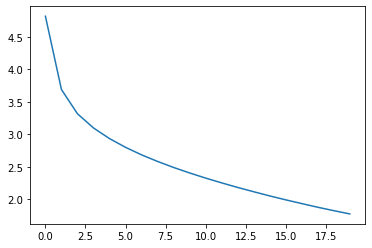

In [8]:
import matplotlib.pyplot as plt

loss = history_gru.history['loss']

plt.plot(np.arange(len(loss)), loss)
plt.show()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/akimoto/nlp'
TYPE = 'gru'

gen_string = model.to_json()
with open(f"{BASE_DIR}/{TYPE}_model.json", mode='w') as f:
    f.write(gen_string)
model.save_weights(f"{BASE_DIR}/{TYPE}_weights.hdf5")